# Assignment 3

### MACS 30000, Dr. Evans
### Siyuan Peng

In [1]:
# Import initial packages
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

### 1. Simulation in Sociology, Moretti (2002)

#### See the attached pdf.

### 2. Simulating your income

#### (a)

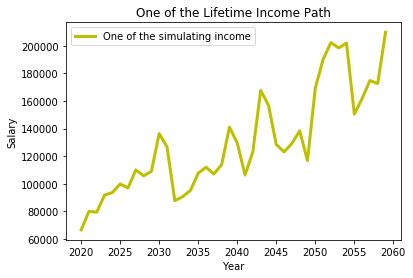

In [2]:
#  First, import the function defined in the question.
def future_inc(t, inc0, last_year_inc, ρ, g, ε):
    lninc = (1 - ρ) * (np.log(inc0) + g * (t-2020)) + ρ * np.log(last_year_inc) + np.log(ε)
    return np.exp(lninc)

# Then, create errors.
errors = np.zeros((10000,40))
σ = 0.13
for i in range(10000):
    errors[i, :] = np.exp(σ * np.random.randn(40))

# Finally, use values provided in the question to compute the income.
inc = np.zeros((10000,40))
inc0 = 80000
ρ = 0.4
g = 0.025
for i in range(10000):
    inc[i, 0] = np.exp(np.log(inc0) + np.log(errors[i, 0]))
    for j in range(1, 40):
        inc[i, j] = future_inc(2020+j, inc0, inc[i, j-1], ρ, g, errors[i, j])

# Draw the plot of one of the lifetime income path. Firstly, set up the time.
years = np.array(list(range(2020,2060)))

# Choose my birthday, Oct 7th as the lucky path.
fig, ax = plt.subplots()
ax.plot(years, inc[1007,:], 'y-', label = 'One of the simulating income',linewidth = 3)
ax.set_title('One of the Lifetime Income Path')
ax.set_xlabel('Year')
ax.set_ylabel('Salary')
ax.legend()
plt.show()

#### (b)

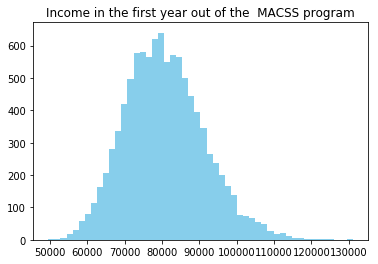

4.32% of my class will earn more than $100,000 in the first year out of the program.
15.14% of my class will earn less than $70,000 in the first year out of the program.


In [3]:
fig, ax = plt.subplots()
ax.hist(inc[:, 0], color='SkyBlue',bins = 50)
ax.set_title('Income in the first year out of the  MACSS program')
plt.show()
percentile_high = len([i for i in inc[:,0] if i > 100000])/10000
percentile_low = len([i for i in inc[:,0] if i < 70000])/10000
print('%.2f%%' % (percentile_high * 100), 'of my class will earn more than $100,000 in the first year out of the program.')
print('%.2f%%' % (percentile_low * 100), 'of my class will earn less than $70,000 in the first year out of the program.')

From the shape of this histogram, its distribution is normally distributed.

#### (c)

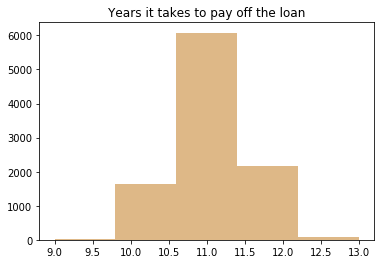

16.71% of the simulations are able to pay off the loan in 10 years.


In [4]:
def loan_period(inc):
    loan = 95000
    for i in range(40):
        loan -= inc[i] * 0.1
        if loan <= 0:
            break
    return i+1
loan_year = np.zeros((10000))
for i in range(10000):
    loan_year[i] = loan_period(inc[i,:])
fig, ax = plt.subplots()
ax.hist(loan_year, color='burlywood', bins = len(set(loan_year)))
ax.set_title("Years it takes to pay off the loan")
plt.show() 
pay_off = len([i for i in loan_year if i <= 10])/10000
print('%.2f%%' % (pay_off * 100), 'of the simulations are able to pay off the loan in 10 years.')

#### (d)

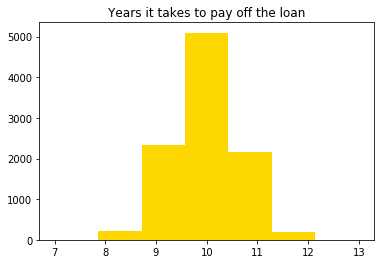

76.44% of the simulations are able to pay off the loan in 10 years.


In [5]:
# First, set up the new errors.
new_errors = np.zeros((10000,40))
new_σ = 0.17
for i in range(10000):
    new_errors[i, :] = np.exp(new_σ * np.random.randn(40))

# Then, use new values provided in the question to compute new income.
new_inc = np.zeros((10000,40))
new_inc0 = 90000
for i in range(10000):
    new_inc[i, 0] = np.exp(np.log(new_inc0) + np.log(new_errors[i, 0]))
    for j in range(1, 40):
        new_inc[i, j] = future_inc(2020+j, new_inc0, new_inc[i, j-1], ρ, g, new_errors[i, j])

# Finally, draw the new plot.
new_loan_year = np.zeros((10000))
for i in range(10000):
    new_loan_year[i] = loan_period(new_inc[i,:])
fig, ax = plt.subplots()
ax.hist(new_loan_year, color='gold', bins = len(set(new_loan_year)))
ax.set_title("Years it takes to pay off the loan")
plt.show() 
pay_off = len([i for i in new_loan_year if i <= 10])/10000
print('%.2f%%' % (pay_off * 100), 'of the simulations are able to pay off the loan in 10 years.')